In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stackoverflow_full.csv')
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


# Data Preprocessing Part 1

In [3]:
# Remove Unnamed: 0 column
df.drop(columns = 'Unnamed: 0',inplace =True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [4]:
# Unique value from all columns
df.select_dtypes(include ='object').nunique()

Age                   2
Accessibility         2
EdLevel               5
Gender                3
MentalHealth          2
MainBranch            2
Country             172
HaveWorkedWith    69980
dtype: int64

# Segment Country into smaller unique value

In [5]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [6]:
# Define a function to segment countries
def continent_country(country):
    if country in ['United States of America', 'Canada', 'Mexico', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Oceania'
    else:
        return 'Others'

# applying to dataset
df['region'] = df['Country'].apply(continent_country)

In [7]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,region
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,Europe
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,Asia


<Axes: >

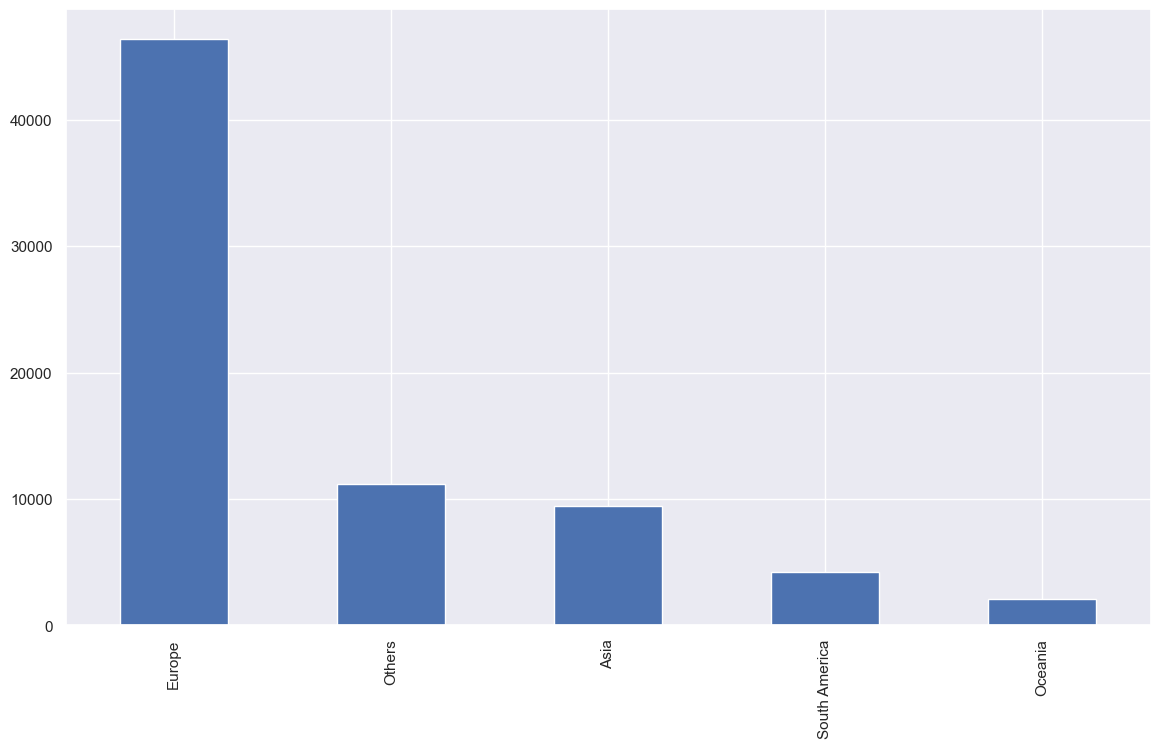

In [8]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
df['region'].value_counts().plot(kind='bar')

In [9]:
# Remove HaveWorkedWith because of having huge unique value
df.drop(columns ='HaveWorkedWith',inplace = True)

In [10]:
# Replace 1 with 'yes' and 0 with 'no' in the 'fraud' column and same to categorical column
df['Employment'] = df['Employment'].replace({0: 'no', 1: 'yes'})
df['Employed'] = df['Employed'].replace({0: 'no', 1: 'yes'})

In [11]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,region
0,<35,No,Master,yes,Man,No,Dev,7,4,Sweden,51552.0,4,no,Europe
1,<35,No,Undergraduate,yes,Man,No,Dev,12,5,Spain,46482.0,12,yes,Europe
2,<35,No,Master,yes,Man,No,Dev,15,6,Germany,77290.0,7,no,Europe
3,<35,No,Undergraduate,yes,Man,No,Dev,9,6,Canada,46135.0,13,no,Europe
4,>35,No,PhD,no,Man,No,NotDev,40,30,Singapore,160932.0,2,no,Asia


Text(0.5, 1.0, 'Top 10 countries which have most Programming Jobs')

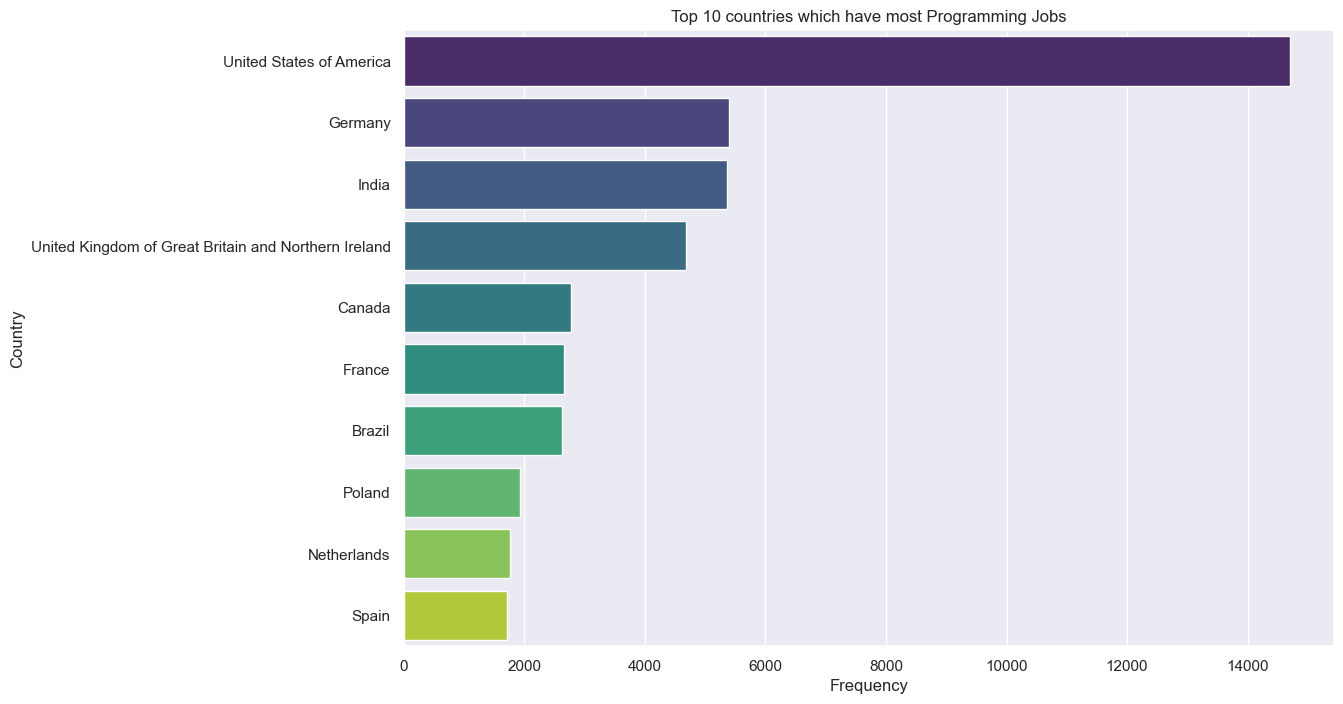

In [12]:
# 10 largest country data 
top_ten = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top_ten,y= top_ten.index, palette = 'viridis')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 10 countries which have most Programming Jobs')

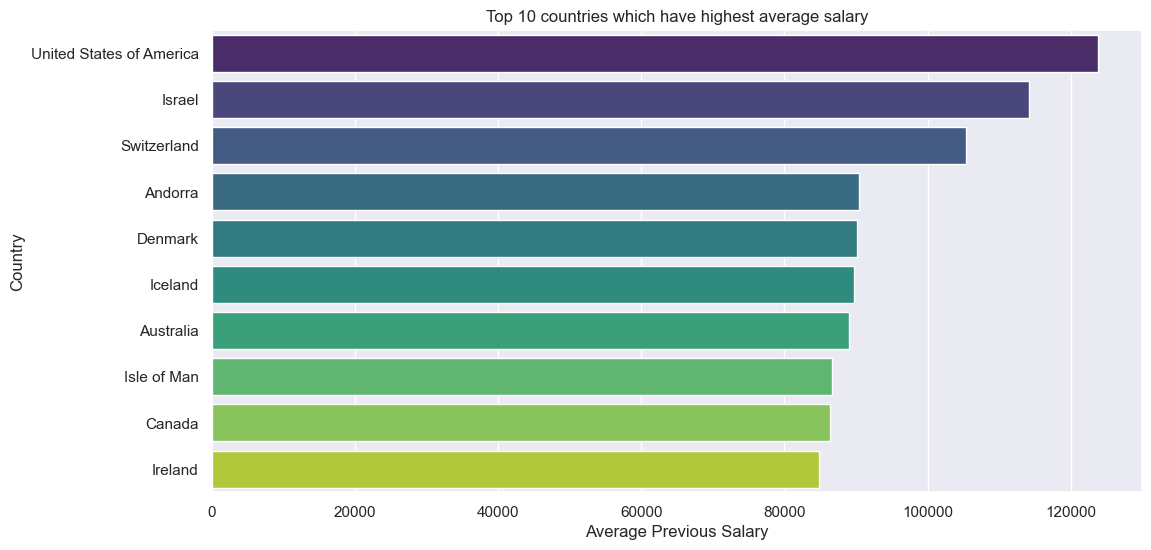

In [13]:
# Group the data by 'Country' and calculate the average 'PreviousSalary' for each country
average_salary_in_country = df.groupby('Country')['PreviousSalary'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='PreviousSalary',y='Country',data=average_salary_in_country,palette='viridis')

plt.xlabel('Average Previous Salary')
plt.ylabel('Country')
plt.title('Top 10 countries which have highest average salary')
plt.show()

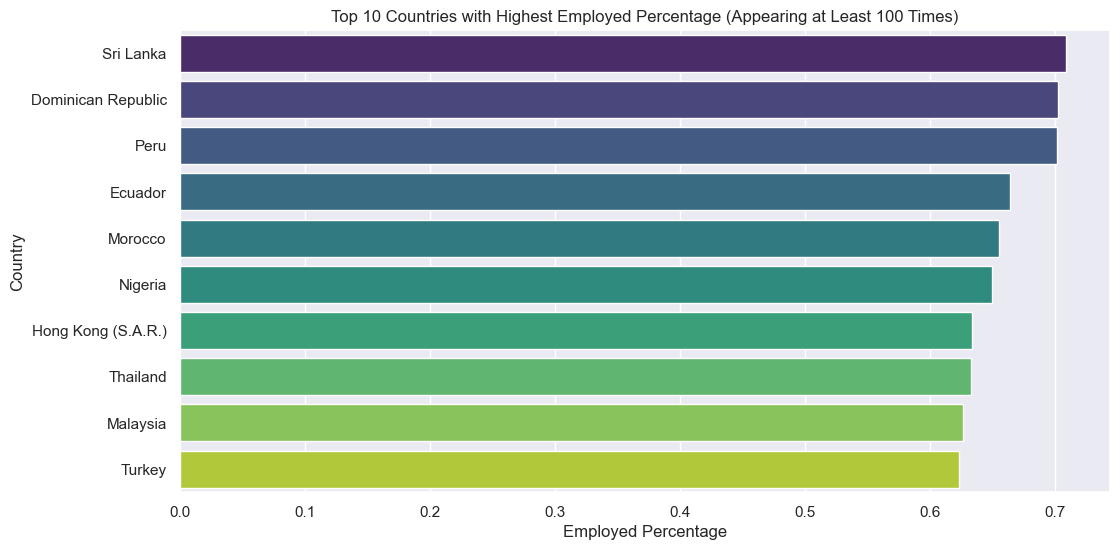

In [14]:
# Calculate the count of each country
country_counts = df['Country'].value_counts()
countries_over_100 = country_counts[country_counts >= 100].index

# Filter the DataFrame to include only the selected countries
filtered_df = df[df['Country'].isin(countries_over_100)]

# Calculate the percentage of employed individuals for each country
employed_percentage = filtered_df.groupby('Country')['Employed'].apply(lambda x: (x == 'yes').sum() / len(x)).reset_index()
employed_percentage = employed_percentage.rename(columns={'Employed': 'EmployedPercentage'})

# Get the top 10 countries with the highest employed percentage
top_countries_employed = employed_percentage.nlargest(10, 'EmployedPercentage')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='EmployedPercentage', y='Country', data=top_countries_employed, palette="viridis")

# Set labels and title
plt.xlabel('Employed Percentage')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Employed Percentage (Appearing at Least 100 Times)')

# Show plot
plt.show()

In [15]:
countries_over_100

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Spain', 'Australia',
       'Italy', 'Sweden', 'Russian Federation', 'Switzerland', 'Turkey',
       'Austria', 'Israel', 'Czech Republic', 'Mexico', 'Belgium', 'Denmark',
       'Ukraine', 'Argentina', 'Norway', 'Iran, Islamic Republic of...',
       'Finland', 'South Africa', 'Pakistan', 'Portugal', 'Romania', 'Greece',
       'New Zealand', 'Hungary', 'Colombia', 'Bangladesh', 'Japan', 'Bulgaria',
       'China', 'Indonesia', 'Ireland', 'Slovenia', 'Nigeria', 'Serbia',
       'Egypt', 'Philippines', 'Sri Lanka', 'Chile', 'Croatia', 'Lithuania',
       'Taiwan', 'Singapore', 'Slovakia', 'Malaysia', 'Viet Nam', 'Kenya',
       'Estonia', 'Uruguay', 'Nepal', 'Belarus', 'Thailand',
       'Hong Kong (S.A.R.)', 'South Korea', 'Peru', 'United Arab Emirates',
       'Georgia', 'Venezuela, Bolivarian Republic of.

# Data Preprocessing Part 2

In [16]:
check_missing = df.isnull().sum()*100 /df.shape[0]
check_missing[check_missing >0].sort_values(ascending=False)

Series([], dtype: float64)

In [17]:
# Drop Country column because we dont need it anymore (region)
df.drop(columns = 'Country', inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,region
0,<35,No,Master,yes,Man,No,Dev,7,4,51552.0,4,no,Europe
1,<35,No,Undergraduate,yes,Man,No,Dev,12,5,46482.0,12,yes,Europe
2,<35,No,Master,yes,Man,No,Dev,15,6,77290.0,7,no,Europe
3,<35,No,Undergraduate,yes,Man,No,Dev,9,6,46135.0,13,no,Europe
4,>35,No,PhD,no,Man,No,NotDev,40,30,160932.0,2,no,Asia


# Label Encoding for object Datatypes

In [18]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Age: ['<35' '>35']
Accessibility: ['No' 'Yes']
EdLevel: ['Master' 'Undergraduate' 'PhD' 'Other' 'NoHigherEd']
Employment: ['yes' 'no']
Gender: ['Man' 'Woman' 'NonBinary']
MentalHealth: ['No' 'Yes']
MainBranch: ['Dev' 'NotDev']
Employed: ['no' 'yes']
region: ['Europe' 'Asia' 'Others' 'South America' 'Oceania']


In [19]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Age: [0 1]
Accessibility: [0 1]
EdLevel: [0 4 3 2 1]
Employment: [1 0]
Gender: [0 2 1]
MentalHealth: [0 1]
MainBranch: [0 1]
Employed: [0 1]
region: [1 0 3 4 2]


<Axes: >

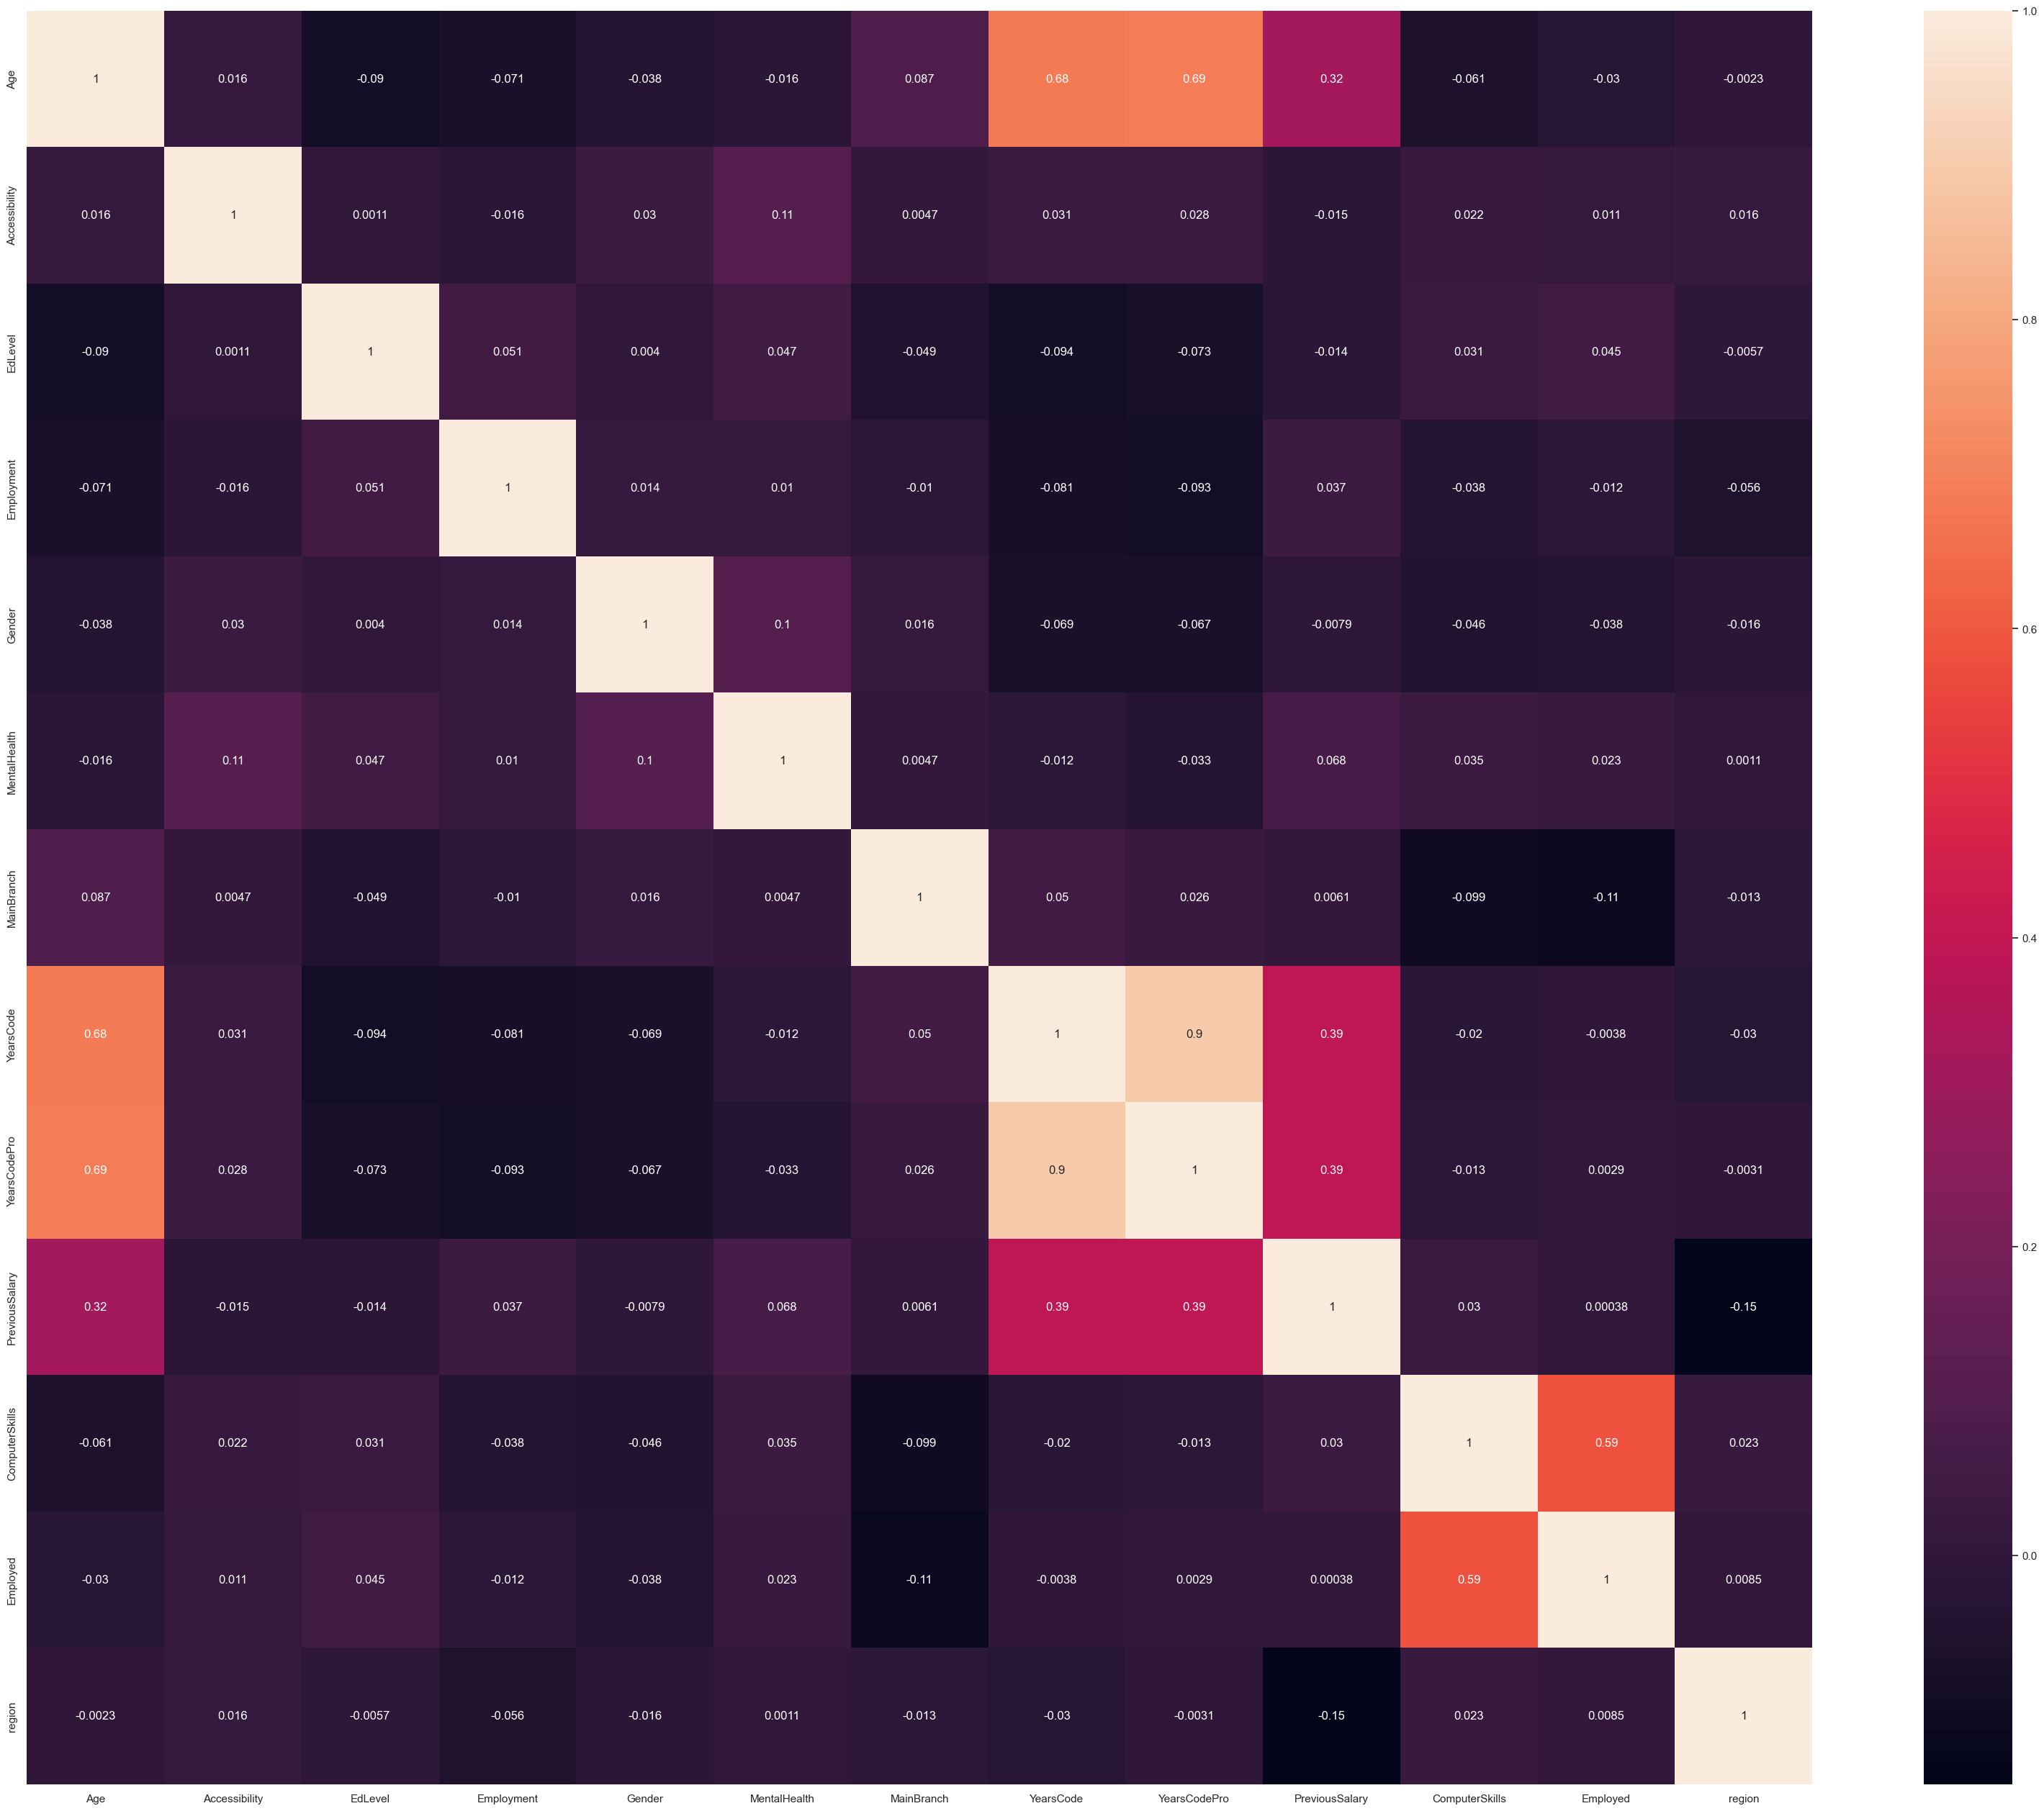

In [20]:
 # Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [21]:
# Remove YearsCodePro column because it have high correlation with YearsCode column
df.drop(columns = 'YearsCodePro', inplace=True)
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,region
0,0,0,0,1,0,0,0,7,51552.0,4,0,1
1,0,0,4,1,0,0,0,12,46482.0,12,1,1
2,0,0,0,1,0,0,0,15,77290.0,7,0,1
3,0,0,4,1,0,0,0,9,46135.0,13,0,1
4,1,0,3,0,0,0,1,40,160932.0,2,0,0


# Train Test Split

In [22]:
X = df.drop('Employed', axis=1)
y = df['Employed']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Remove Outlier from Train data using Z-Score

In [23]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['YearsCode', 'PreviousSalary', 'ComputerSkills']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Model Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.11 %


# XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, subsample=0.8)
xgb_classifier.fit(X_train, y_train)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")